# Tugas Besar IF2220 Probabilitas dan Statistika
### Penarikan Kesimpulan dan Pengujian Hipotesis


### Author
- Vieri Fajar Firdaus / 13521099
- Saddam Annais Shaquille / 13521121

### Inisialisasi library dan data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

anggur = pd.read_csv('anggur.csv')
anggur.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8


### Column Description
- Fixed acidity (keasaman tetap): jumlah asam yang terkandung dalam anggur yang tidak mudah menguap.
- Volatile acidity (keasaman mudah menguap): jumlah asam yang terkandung dalam anggur yang mudah menguap.
- Citric acid (asam sitrat): jumlah asam sitrat yang terkandung dalam anggur.
- Residual sugar (gula sisa): jumlah gula yang tersisa setelah fermentasi selesai.
- Chlorides (klorida): jumlah garam klorida yang terkandung dalam anggur.
- Free sulfur dioxide (sulfur dioksida bebas): jumlah sulfur dioksida bebas yang terkandung dalam anggur.
- Total sulfur dioxide (total sulfur dioksida): jumlah sulfur dioksida total yang terkandung dalam anggur.
- Density (densitas): berat relatif anggur dibandingkan dengan air murni pada 20 derajat Celsius.
- pH: tingkat keasaman pada skala 0 hingga 14.
- Sulphates (sulfat): jumlah sulfat yang terkandung dalam anggur.
- Alcohol (alkohol): persentase alkohol dalam anggur.
- Quality (kualitas): skor kualitas antara 0 dan 10 berdasarkan data sensorik.

### 2. Membuat Visualisasi plot distribusi dalam bentuk histogram dan boxplot untuk setiap kolom numerik.

In [3]:
# Make a function to show the histogram and box plots
def hist_box_plot(df: pd.DataFrame, column: str) -> None:
  fig, (ax1, ax2) =plt.subplots(nrows = 2, ncols = 1, figsize=(10, 5), sharex=True)
  g1 = sns.histplot(data = df, x = column, ax=ax1, color="#03C988", kde = True, line_kws={"linewidth": 1.5, "alpha": 1})
  g1.lines[0].set_color('#DF7857')
  g2 = sns.boxplot(data = df, x = column, ax=ax2, color="#03C988", flierprops={"marker":'o', "markersize":5, "markeredgecolor":'black', "markerfacecolor":'white', "alpha":0.6})
  g1.set(xlabel=None)
  g1.set(ylabel=None)
  g2.set(xlabel=None)
  g2.set(ylabel=None)
  fig.suptitle(column, y = 0.95, fontsize = 17)

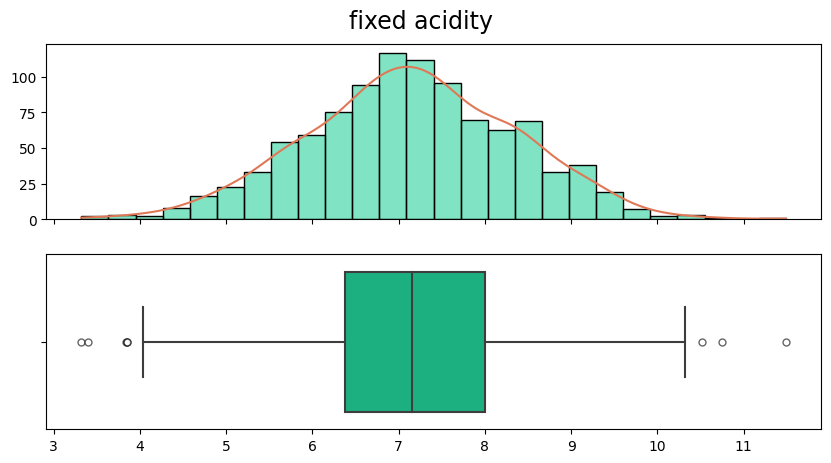

In [4]:
# Untuk kolom fixed acidity
hist_box_plot(anggur, anggur.columns[0])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan condong kiri (*negative skewed*) yang hampir tidak terlihat. 
- Berdasarkan boxplot, terlihat bahwa data fix acidity memiliki rentang nilai yang cukup beragam. 
- Nilai minimumnya hampir mendekati 4 dan maksimumnya melebihi 10 serta mediannya sedikit di atas 7
- Terdapat beberapa *outliers* yang terlihat di bawah nilai minimum maupun di atas nilai maksimum. 

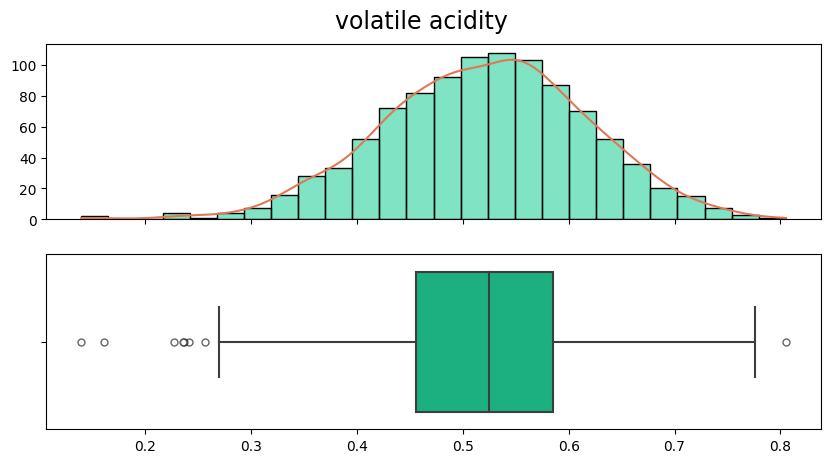

In [5]:
# Untuk kolom volatile acidity
hist_box_plot(anggur, anggur.columns[1])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan sedikit condong kanan (*positive skewed*). 
- Berdasarkan boxplot, terlihat bahwa data *volatile acidity* memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya kurang dari 0.3 dan maksimumnya kurang dari 0.8 serta mediannya sedikit di atas 0.5.
- Terdapat 1 *outliers* yang terlihat di atas nilai maksimum dan beberapa lainnya di bawah nilai minimum. 

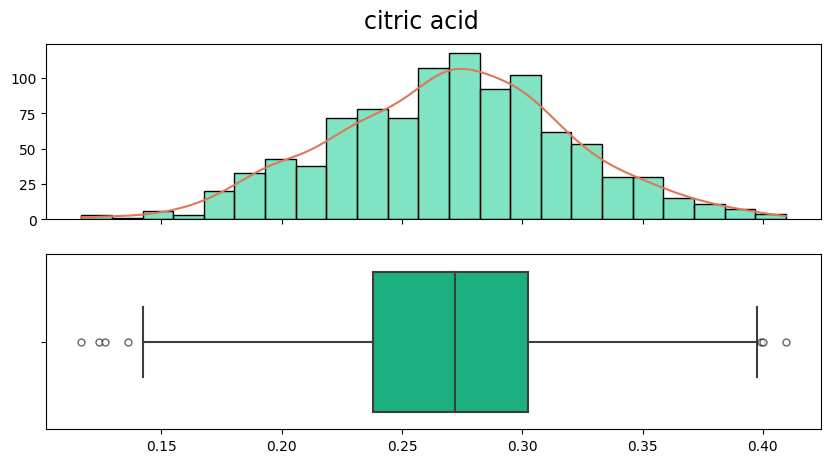

In [6]:
# Untuk kolom citric acid
hist_box_plot(anggur, anggur.columns[2])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan sedikit condong kiri (*negative skewed*). 
- Berdasarkan boxplot, terlihat bahwa data *citric acid* memiliki rentang sangat kecil.
- Nilai minimumnya kurang dari 0.15 dan maksimumnya kurang dari 0.4 serta mediannya di antara 0.25 dan 0.30.
- Terdapat beberapa *outliers* yang terlihat di atas nilai maksimum dan beberapa lainnya di bawah nilai minimum. 

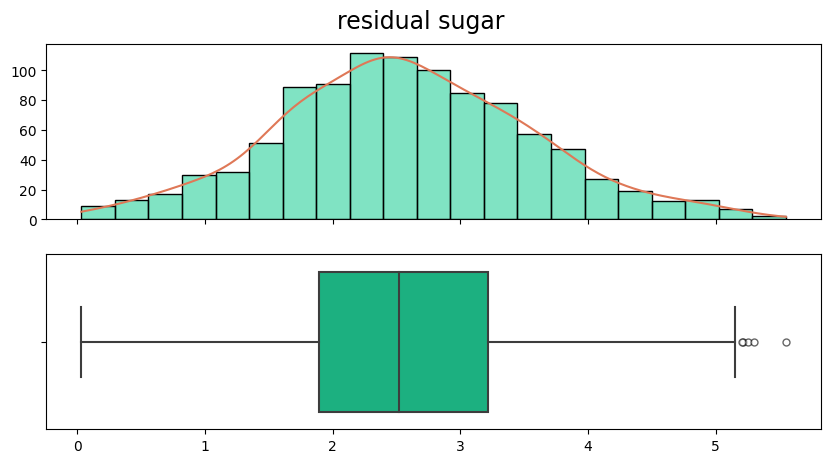

In [7]:
# Untuk kolom residual sugar
hist_box_plot(anggur, anggur.columns[3])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan sedikit condong kiri (*negative skewed*). 
- Berdasarkan boxplot, terlihat bahwa data *residual sugar* memiliki rentang nilai yang cukup kecil.
- Nilai minimumnya 0 dan maksimumnya sedikit lebih dari 5 serta mediannya di antara 2 dan 3.
- *outliers* tidak terlihat di bawah nilai minimumnya tapi terdapat beberapa di atas nilai maksimumnya. 

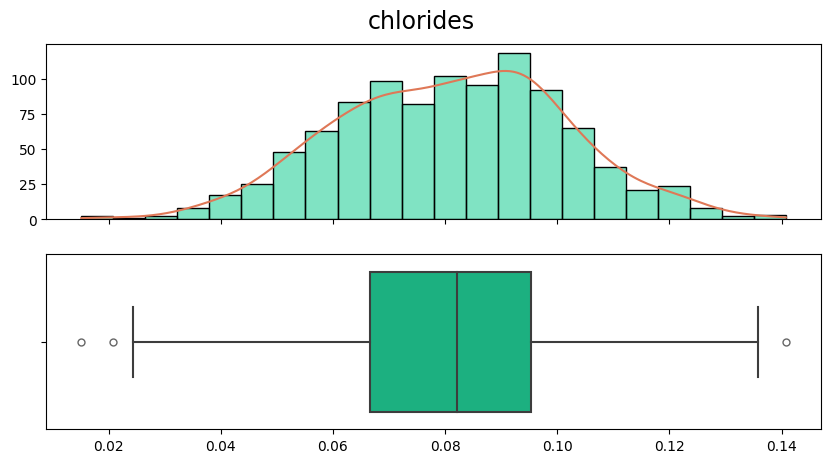

In [8]:
# Untuk kolom chlorides
hist_box_plot(anggur, anggur.columns[4])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (*positive skewed*). 
- Berdasarkan boxplot, terlihat bahwa data *cholrides* memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya sedikit lebih dari 0.02 dan maksimumnya sedikit kurang dari 0.14 serta mediannya di sedikit di atas 0.08.
- Beberapa *outliers* terlihat di bawah nilai minimumnya dan di atas nilai maksimumnya. 

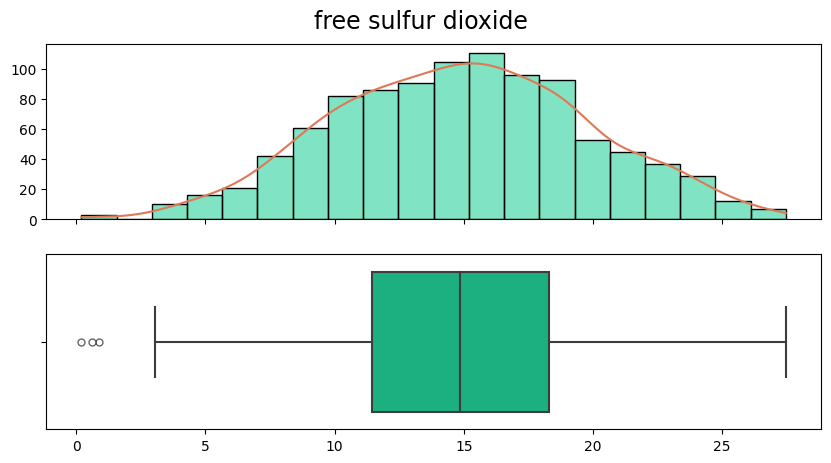

In [9]:
# Untuk kolom free sulfur dioxide
hist_box_plot(anggur, anggur.columns[5])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (*positive skewed*). 
- Berdasarkan boxplot, terlihat bahwa data *free sulfur dioxied* memiliki rentang nilai yangs kecil.
- Nilai minimumnya berada di antara 0 dan 5 serta maksimumnya lebih dari.25 serta mediannya sekitar 15.
- Tidak terdapat *outliers* yang terlihat di bawah atas nilai maksimumnya tapi terlihat beberapa di bawah minimumnya. 

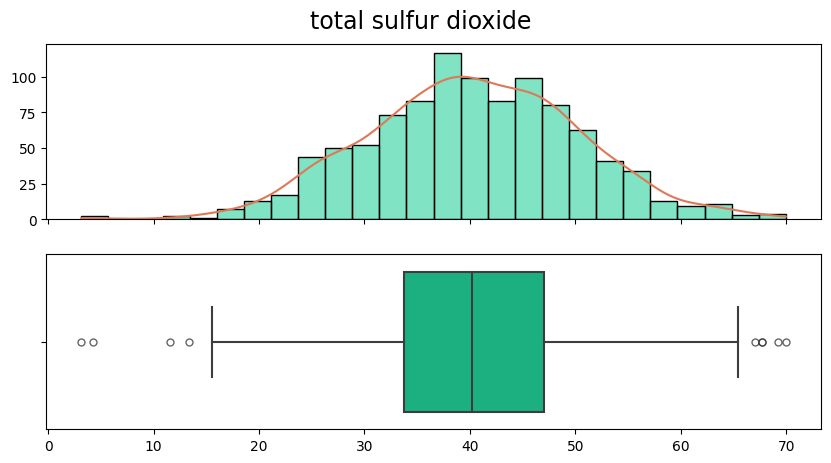

In [10]:
# Untuk kolom total sulfur dioxide
hist_box_plot(anggur, anggur.columns[6])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kiri (*negative skewed*) yang hampir tidak terlihat. 
- Berdasarkan boxplot, terlihat bahwa data *total sulfur dioxied* memiliki rentang nilai yang cukup besar.
- Nilai minimumnya sekitar 15 dan maksimumnya sekitar 65 serta mediannya sekitar 40.
- Beberapa *outliers* terlihat di bawah nilai minimumnya dan di atas nilai maksimumnya. 

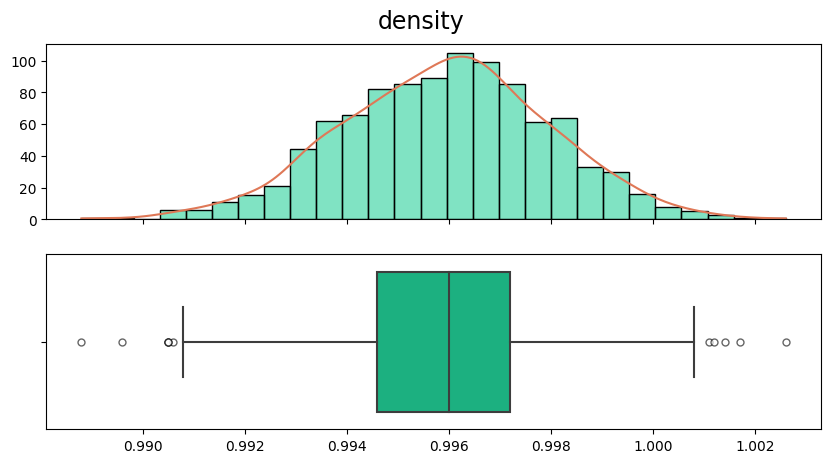

In [11]:
# Untuk kolom density
hist_box_plot(anggur, anggur.columns[7])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (*positive skewed*) yang hampir tidak terlihat. 
- Berdasarkan boxplot, terlihat bahwa data *density* memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya sekitar 0.991 dan maksimumnya sekitar 1,001 serta mediannya sekitar 0.996.
- Beberapa *outliers* terlihat di bawah nilai minimumnya dan di atas nilai maksimumnya. 

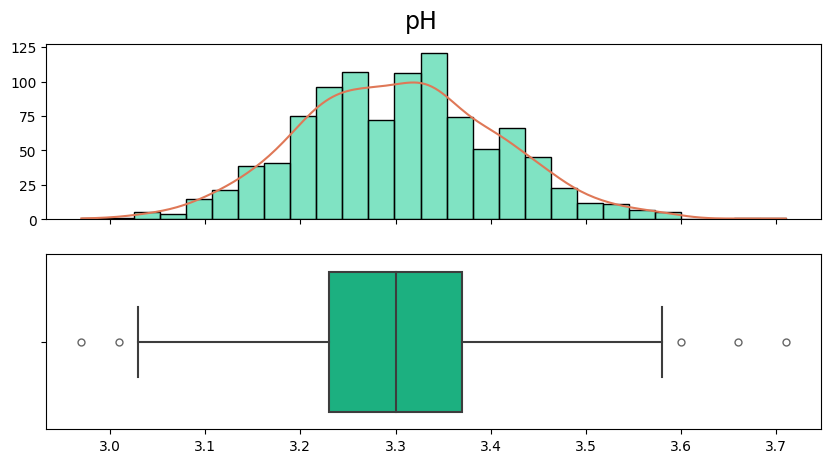

In [12]:
# Untuk kolom pH
hist_box_plot(anggur, anggur.columns[8])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kiri (*negative skewed*) yang hampir tidak terlihat. 
- Berdasarkan boxplot, terlihat bahwa data *pH* memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya sekitar 3 dan maksimumnya sekitar 3.6 serta mediannya sekitar 3.3.
- Beberapa *outliers* terlihat di bawah nilai minimumnya dan di atas nilai maksimumnya. 

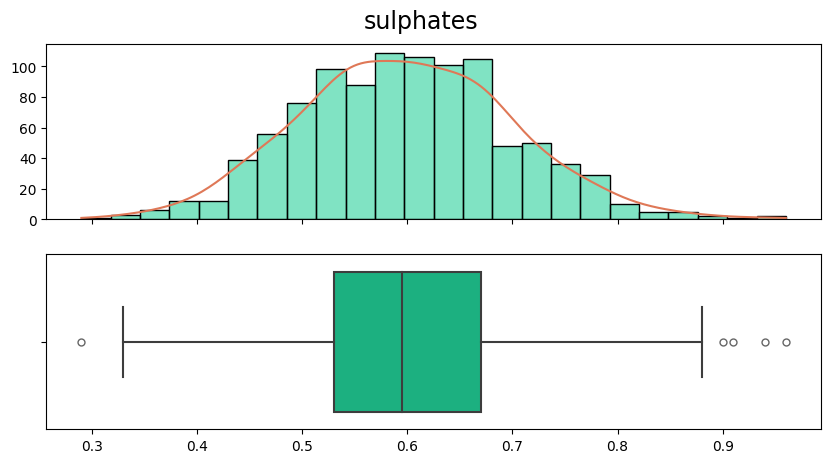

In [13]:
# Untuk kolom sulphates
hist_box_plot(anggur, anggur.columns[9])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (*positive skewed*). 
- Berdasarkan boxplot, terlihat bahwa data *sulphates* memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya sekitar 0.3 dan maksimumnya sekitar 0.9 serta mediannya sekitar 0.6.
- Beberapa *outliers* terlihat di atas nilai maksimumnya dan terdapat 1 outliers di bawah nilai minimumnya. 

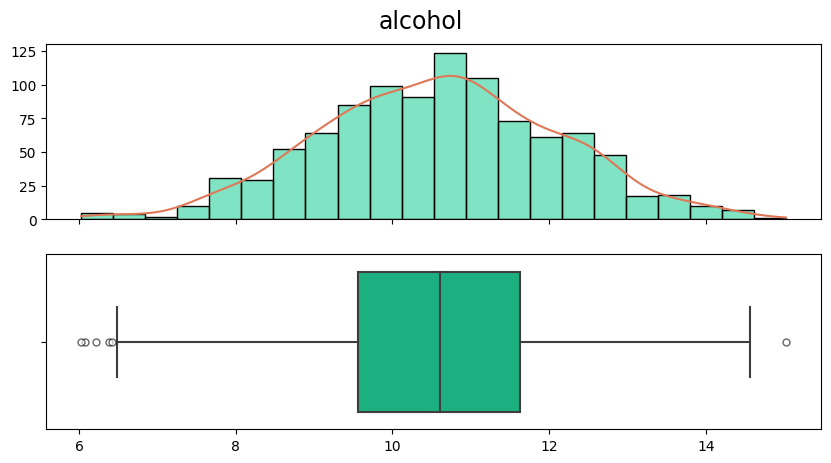

In [14]:
# Untuk kolom alcohol
hist_box_plot(anggur, anggur.columns[10])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (*positive skewed*). 
- Berdasarkan boxplot, terlihat bahwa data *alcohol* memiliki rentang nilai yang kecil.
- Nilai minimumnya sekitar 6 dan maksimumnya sekitar 14 serta mediannya sekitar 10.
- Beberapa *outliers* terlihat di bawah nilai minimumnya dan terdapat 1 outliers di atas nilai maksimumnya. 

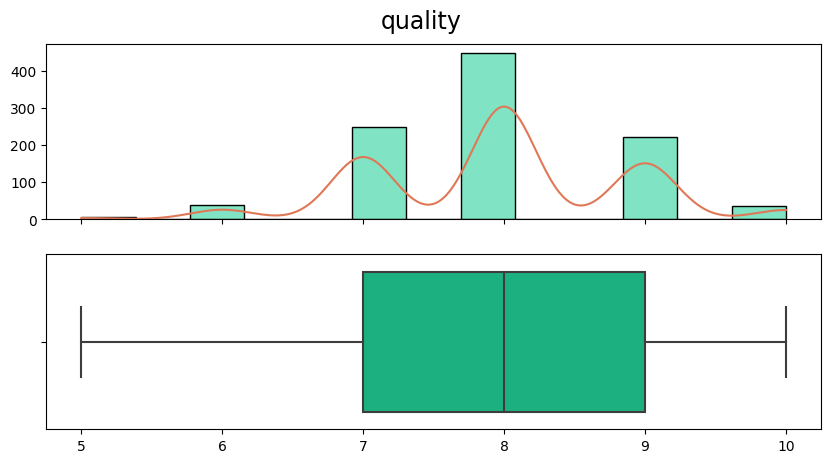

In [15]:
# Untuk kolom alcohol
hist_box_plot(anggur, anggur.columns[11])

- Berdasarkan histogram, terlihat bahwa data terdistribusi normal. 
- Berdasarkan boxplot, terlihat bahwa data *quailty* memiliki rentang nilai cukup kecil.
- Nilai minimumnya 5 dan maksimumnya sekitar 10 serta mediannya 8.
- Pada data ini pula tidak terdapat *outliers*. 